<a href="https://colab.research.google.com/github/pacnpacn/BUGAN/blob/master/script_load3Dobj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#right click shared folder IRCMS_GAN_collaborative_database and "Add shortcut to Drive" to My drive
%cd drive/My Drive/IRCMS_GAN_collaborative_database/Research/Peter/Tree_3D_models_obj/
!ls

/content/drive/.shortcut-targets-by-id/1ylB2p6N0qQ-G4OsBuwcZ9C0tsqVu9ww4/IRCMS_GAN_collaborative_database/Research/Peter/Tree_3D_models_obj
generated_files  maple_3.obj	     old_1.obj	script_GANvoxel1.ipynb
maple_1.obj	 maple_example2.mtl  old_2.obj	script_load3Dobj.ipynb
maple_2.obj	 maple_example2.obj  old_3.obj


In [3]:
!pip install open3d

     |████████████████████████████████| 4.6MB 2.8MB/s 


In [4]:
import open3d as o3d
import numpy as np

#add open3d to process voxel, mesh, and point cloud
#open3d function playground

In [ ]:
mesh = o3d.io.read_triangle_mesh('maple_1.obj')
box = mesh.get_axis_aligned_bounding_box()
print(box.get_center())
print(box.get_extent())

[Open3D WARNING] Read OBJ failed: Material file [ maple_1.mtl ] not found.
Failed to load material file(s). Use default material.

[  3.58128166  20.40564108 -10.19721413]
[61.14041519 56.29646778 63.36407089]


In [ ]:
max_length = np.max(np.array(box.get_extent()))
mesh = mesh.translate(-box.get_center())
mesh = mesh.scale(70/max_length, [0,0,0])
box = mesh.get_axis_aligned_bounding_box()
print(box.get_center())
print(box.get_extent())

[0. 0. 0.]
[62.09647821 70.         59.35816891]


In [ ]:
# voxel_size=1. initial:10 mins; voxel_size=.5 initial:20 mins; voxel_size=.3 initial:88 mins
vox = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, 0.3)  

In [ ]:
o3d.io.write_voxel_grid('generated_files/old_3_voxel_size03.ply', vox)

#process all files

In [5]:
import os

data = []
for file_name in os.listdir():
    if file_name.endswith(".obj"):
        mesh = o3d.io.read_triangle_mesh(file_name)
        box = mesh.get_axis_aligned_bounding_box()
        print(file_name[:-4])
        print(box.get_center())
        print(box.get_extent())

[Open3D WARNING] Read OBJ failed: Material file [ maple_1.mtl ] not found.
Failed to load material file(s). Use default material.

maple_1
[  3.58128166  20.40564108 -10.19721413]
[61.14041519 56.29646778 63.36407089]
[Open3D WARNING] Read OBJ failed: Material file [ maple_2.mtl ] not found.
Failed to load material file(s). Use default material.

maple_2
[ -4.84823418  22.46717715 -15.19634247]
[63.94066238 59.78599787 68.73703766]
[Open3D WARNING] Read OBJ failed: Material file [ maple_3.mtl ] not found.
Failed to load material file(s). Use default material.

maple_3
[-5.25910282 10.37813091 -7.24861336]
[65.72273827 62.72468758 53.11114883]
[Open3D WARNING] Read OBJ failed: Material file [ old_1.mtl ] not found.
Failed to load material file(s). Use default material.

old_1
[11.28943825 14.19364166  4.37327766]
[119.34400558 126.5975647   95.57413101]
[Open3D WARNING] Read OBJ failed: Material file [ old_2.mtl ] not found.
Failed to load material file(s). Use default material.

old_2


In [6]:
def voxel2arrayCentered(voxel, tree_size_scale = 1):
    array_size = np.array([250,250,250])
    vox_array = np.zeros(array_size, dtype=int)  
    tree_size = np.array(voxel.get_axis_aligned_bounding_box().get_extent())
    tree_size = np.ceil(tree_size / tree_size_scale)    #voxel_size = tree_size_scale
    tree_center = (np.ceil(tree_size / 2)).astype(int)

    vox_list = voxel.get_voxels()
    for vox in vox_list:
        coord = vox.grid_index
        #center the tree
        coord = coord - tree_center + (array_size/2)
        coord = tuple(coord.astype(int))

        vox_array[coord] = 1.

    return vox_array

In [ ]:
import os

data = []
for file_name in os.listdir():
    if file_name.endswith(".obj"):
        #desired box size = (70,70,70)
        mesh = o3d.io.read_triangle_mesh(file_name)
        box = mesh.get_axis_aligned_bounding_box()
        max_length = np.max(np.array(box.get_extent()))
        mesh = mesh.translate(-box.get_center())
        mesh = mesh.scale(70/max_length, [0,0,0])
        vox = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, 0.3)
        voxel2arrayCentered(vox, 0.3)       #make sure files can fit in [250,250,250] box
        o3d.io.write_voxel_grid('generated_files/'+ file_name[:-4] +'_voxel_size03.ply', vox) 

[Open3D WARNING] Read OBJ failed: Material file [ maple_1.mtl ] not found.
Failed to load material file(s). Use default material.



#visualization

In [ ]:
#note that the voxel_size of vox is 0.3, so we scale it back to one for indexing
vox_array = voxel2arrayCentered(vox, 0.3)

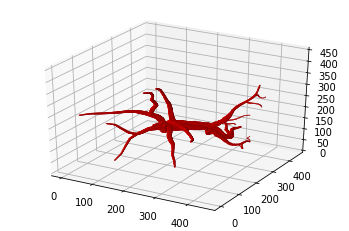

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(vox_array, facecolors='red')

plt.show()

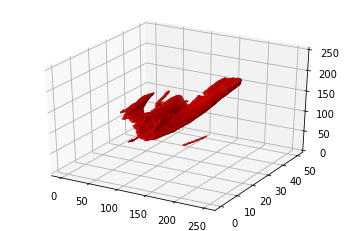

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(vox_array[:,100:150, :], facecolors='red')    # array index 1 is height of tree

plt.show()

check convert from dense array back to voxel

In [ ]:
def array2voxel(array):
    coord_list = []
    x,y,z = array.shape
    for i in range(x):
        for j in range(y):
            for k in range(z):
                if array[i,j,k] > 0.5:
                    coord_list.append([i,j,k])

    return np.array(coord_list)


In [ ]:
voxel_list = array2voxel(vox_array)

In [ ]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(voxel_list)
vox_rebuild = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, 1.) 

In [ ]:
vox_list = vox_rebuild.get_voxels()

In [ ]:
#turn back to array and visualize
vox_array_rebuild = voxel2arrayCentered(vox_rebuild, 1)

In [ ]:
print(np.sum(vox_array_rebuild))
print(np.sum(vox_array))

75715
75715


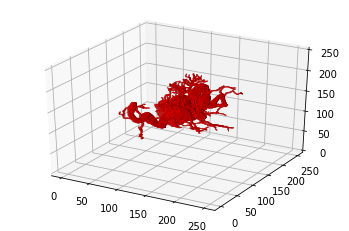

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(vox_array_rebuild, facecolors='red') 

plt.show()